# Gendered Emotions: Masculine and Feminine Emotional Modes of Writing in Japanese Atomic Bomb Literature

In [1]:
import pandas as pd
import statistics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

### Corpus Description

This corpus contains of 117 fiction pieces taken from *Nihon no genbaku bungaku* (*Japanese Atomic Bomb Literature*), a 15-volume anthology of *genbaku bungaku* (Atomic Bomb Literature). The texts were scanned and OCR-ed with ABBYY FineReader and splitted into the pieces following the anthology's division (chapters of longer novels were put in the corpus as separate pieces). Non-fiction (like essays, correspondence, etc.) were excluded from the analysis.
The corpus contains from works of 42 authors, among which 32 are males and 10 females:
<br>
Male authors:<br>
Abe Kazue<br>
Fujimoto Hitoshi<br>
Fumizawa Ryuichi<br>
Hara Tamiki<br>
Hashioka Takeshi<br>
Hosoda Tamiki<br>
Hotta Yoshie<br>
Iida Momo<br>
Ikuguchi Juro<br>
Inoue Mitsuhara<br>
Ishida Koji<br>
Iwasaki Seiichiro<br>
Kajiyama Tohiyuki<br>
Kamezawa Miyuki<br>
Kanai Toshihiro<br>
Katsura Yoshihisa<br>
Kawakami Sokun<br>
Kokubo Hitoshi<br>
Kurita Tohei<br>
Kyo Kusao<br>
Nakai Masafumi<br>
Nakayama Shiro<br>
Nakazato Kisho<br>
Natsubori Masamoto<br>
Nishihara Kei<br>
Ochi Michio<br>
Oda Katsuzo<br>
Oda Makoto<br>
Oe Kenzaburo<br>
Saiki Hisao<br>
Takeda Taijun<br>
Tsukuda Jitsuo<br>
<br>
Female authors:<br>
<br>
Ariyoshi Sawako<br>
Hayashi Kyoko<br>
Hironaka Toshio<br>
Inada Mihoko<br>
Kora Chihoko<br>
Mikawa Kiyo<br>
Nakamoto Takako<br>
Ota Yoko<br>
Sata Ineko<br>
Takenishi Hiroko<br>
<br>
Among which there are 76 pieces written by males and 41 by females.


### Sentiment Analysis

In [2]:
sentiment_data = pd.read_excel(r"C:\Users\Artem\Documents\my python projects\Masculine and Feminine in Atomic Bomb Literature\data\results.xlsx")
sentiment_data

,Unnamed: 0,Title,Gender,Length in characters,Overall Sentiment,Direct Speech Sentiment,Author's Speech Sentiment,Difference Value,Exceeds?
0,0,有吉 佐和子 - 祈禱,F,30102,0.007671,0.065030,-0.035530,0.100560,Yes
1,1,林 京子 - ギヤマン ビードロ,F,112867,-0.011454,-0.054455,-0.010385,-0.044071,No
2,2,林 京子 - 二人の墓標,F,22251,-0.110104,-0.139089,-0.098741,-0.040348,No
3,3,林 京子 - 同期会,F,16390,0.016105,0.142857,0.017386,0.125471,Yes
4,4,林 京子 - 昭和二十年の夏,F,18826,-0.013255,0.500000,-0.015090,0.515090,Yes
...,...,...,...,...,...,...,...,...,...
112,112,大江 健三郎 - ヒロシマ・ノ—卜 7,M,10756,-0.119351,-0.257576,-0.111784,-0.145792,No
113,113,大江 健三郎 - 核状況のカナリア理論,M,16313,0.006504,-0.204678,0.023987,-0.228665,No
114,114,斎木寿夫 - 死者は裁かない,M,17833,-0.130481,-0.121918,-0.128818,0.006900,Yes
115,115,武田 泰淳 - 第一のボタン,M,78975,0.004374,0.045368,-0.023118,0.068487,Yes


In [3]:
female_difference = list(sentiment_data["Difference Value"][:41])
male_difference = list(sentiment_data["Difference Value"][41:])
print(f"Women's average sentiment differense: {statistics.mean(female_difference)}")
print(f"Women's median sentiment differense: {statistics.median(female_difference)}\n")
print(f"men's average sentiment differense: {statistics.mean(male_difference)}")
print(f"men's median sentiment differense: {statistics.median(male_difference)}\n")
negative_male = [score for score in male_difference if score <0]
negative_female = [score for score in female_difference if score <0]
print(f"Ratio of negative sentiment cases in women's writings: {len(negative_female)} of {len(female_difference)} or {len(negative_female) / len(female_difference)}")
print(f"Ratio of negative sentiment cases in men's writings: {len(negative_male)} of {len(male_difference)} or {len(negative_male) / len(male_difference)}")


Women's average sentiment differense: 0.014651917183045697
Women's median sentiment differense: 0.04096650192202086

men's average sentiment differense: 0.0633126076839378
men's median sentiment differense: 0.03955918100802006

Ratio of negative sentiment cases in women's writings: 17 of 41 or 0.4146341463414634
Ratio of negative sentiment cases in men's writings: 19 of 76 or 0.25


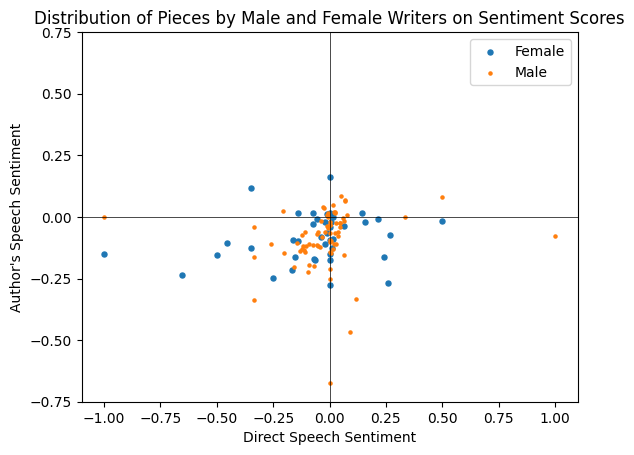

In [4]:
x_female = sentiment_data["Direct Speech Sentiment"][:41]
x_male = sentiment_data["Direct Speech Sentiment"][41:]
y_female = sentiment_data["Author\'s Speech Sentiment"][:41]
y_male = sentiment_data["Author\'s Speech Sentiment"][41:]

plt.scatter(x_female, y_female, label='Female', s=13)
plt.scatter(x_male, y_male, label='Male', s=5)
plt.yticks([-0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75])
plt.xticks([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])
plt.axhline(c="black", linewidth=0.5)
plt.axvline(c="black", linewidth=0.5)
plt.legend()
plt.title('Distribution of Pieces by Male and Female Writers on Sentiment Scores')
plt.xlabel('Direct Speech Sentiment')
plt.ylabel("Author's Speech Sentiment")

plt.show()

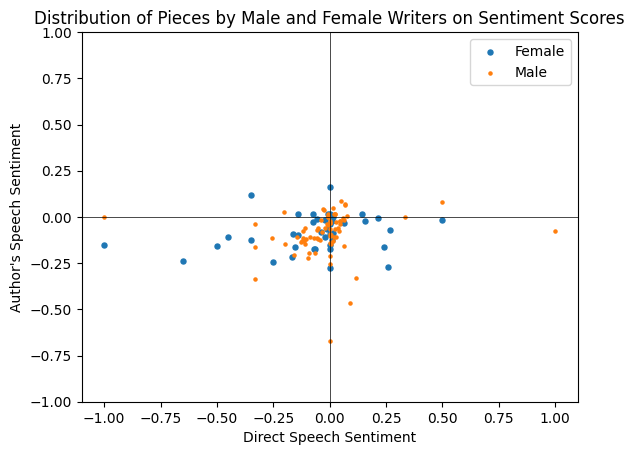

In [5]:
plt.scatter(x_female, y_female, label='Female', s=13)
plt.scatter(x_male, y_male, label='Male', s=5)
plt.yticks([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])
plt.xticks([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])
plt.axhline(c="black", linewidth=0.5)
plt.axvline(c="black", linewidth=0.5)
plt.legend()
plt.title('Distribution of Pieces by Male and Female Writers on Sentiment Scores')
plt.xlabel('Direct Speech Sentiment')
plt.ylabel("Author's Speech Sentiment")
plt.savefig("sentiment distribution 1.jpeg", dpi=200)

plt.show()

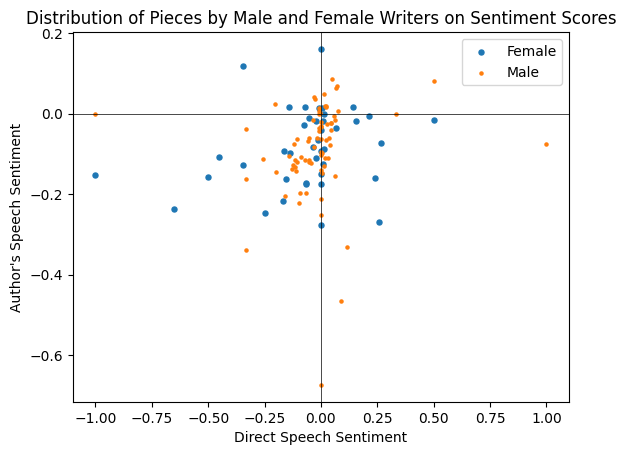

In [6]:
plt.scatter(x_female, y_female, label='Female', s=13)
plt.scatter(x_male, y_male, label='Male', s=5)
plt.axhline(c="black", linewidth=0.5)
plt.axvline(c="black", linewidth=0.5)
plt.legend()
plt.title('Distribution of Pieces by Male and Female Writers on Sentiment Scores')
plt.xlabel('Direct Speech Sentiment')
plt.ylabel("Author's Speech Sentiment")
plt.savefig ("sentiment distribution 2.jpeg",dpi=200)

plt.show()

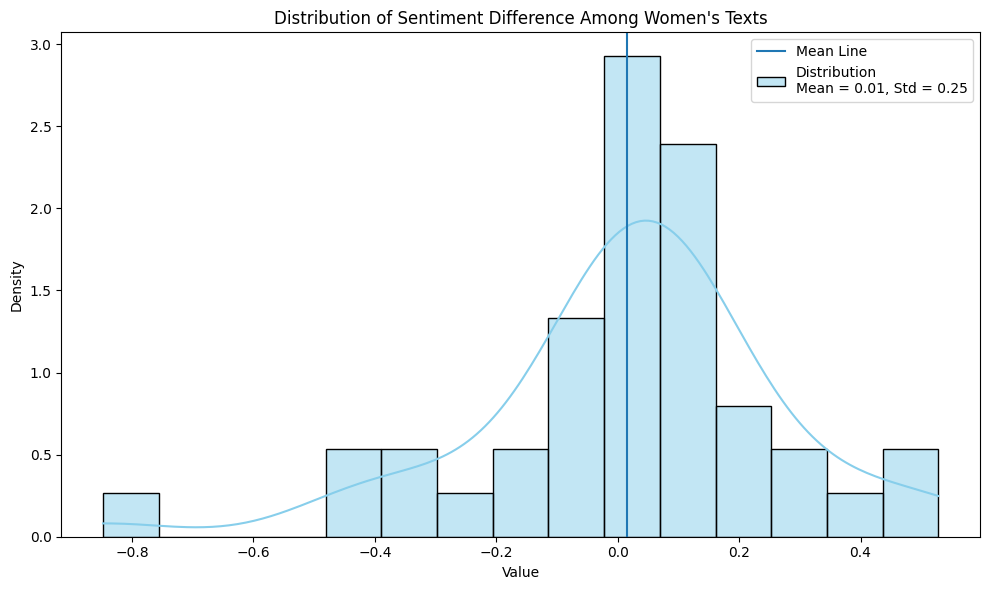

In [11]:
data = female_difference
mu, std = np.mean(data), np.std(data)
plt.figure(figsize=(10, 6))
sns.histplot(data, bins=15, kde=True, color='skyblue', stat='density', edgecolor='black', label=f"Distribution\nMean = {mu:.2f}, Std = {std:.2f}")
plt.axvline(x=mu, label = "Mean Line")
plt.title("Distribution of Sentiment Difference Among Women's Texts")
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.savefig("distribution women.jpeg", dpi=200)
plt.show()


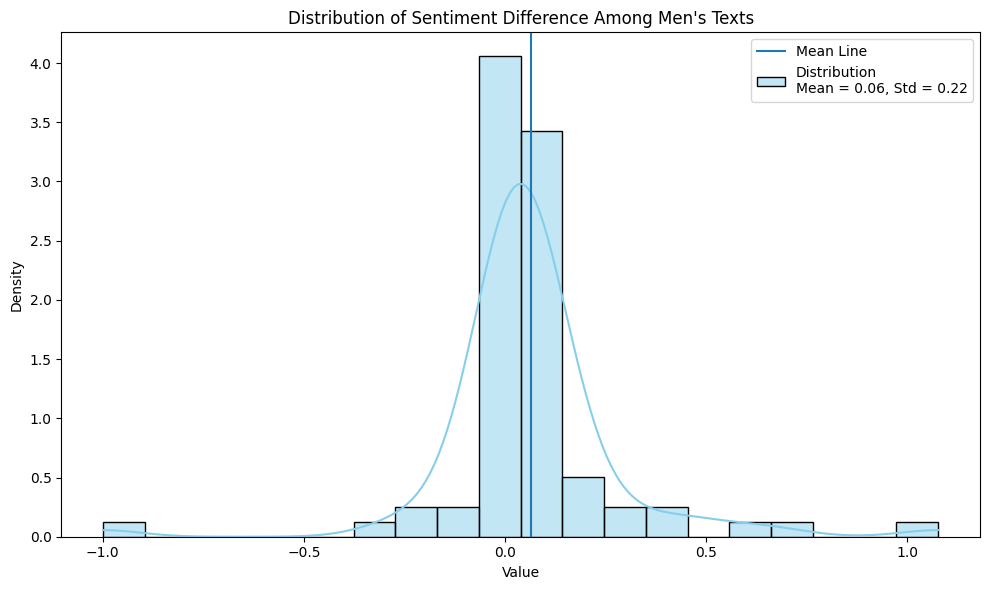

In [13]:
data = male_difference
plt.figure(figsize=(10, 6))
mu, std = np.mean(data), np.std(data)
sns.histplot(data, bins=20, kde=True, color='skyblue', stat='density', edgecolor='black', label=f"Distribution\nMean = {mu:.2f}, Std = {std:.2f}")
plt.axvline(x=mu, label = "Mean Line")
plt.title("Distribution of Sentiment Difference Among Men's Texts")
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.savefig("distribution men.jpeg", dpi=200)
plt.show()

In [2]:
data_set = pd.read_excel("data\\results without zero values.xlsx")
data_set

,Unnamed: 0,Title,Gender,Length in characters,Overall Sentiment,Direct Speech Sentiment,Author's Speech Sentiment,Difference Value,Exceeds?
0,1,林 京子 - ギヤマン ビードロ,F,112867,-0.011454,-0.054455,-0.010385,-0.044071,No
1,2,林 京子 - 二人の墓標,F,22251,-0.110104,-0.139089,-0.098741,-0.040348,No
2,3,林 京子 - 同期会,F,16390,0.016105,0.142857,0.017386,0.125471,Yes
3,4,林 京子 - 昭和二十年の夏,F,18826,-0.013255,0.500000,-0.015090,0.515090,Yes
4,5,林 京子 - 曇り日の行進,F,17944,-0.008522,0.155556,-0.019675,0.175231,Yes
...,...,...,...,...,...,...,...,...,...
96,112,大江 健三郎 - ヒロシマ・ノ—卜 7,M,10756,-0.119351,-0.257576,-0.111784,-0.145792,No
97,113,大江 健三郎 - 核状況のカナリア理論,M,16313,0.006504,-0.204678,0.023987,-0.228665,No
98,114,斎木寿夫 - 死者は裁かない,M,17833,-0.130481,-0.121918,-0.128818,0.006900,Yes
99,115,武田 泰淳 - 第一のボタン,M,78975,0.004374,0.045368,-0.023118,0.068487,Yes


In [3]:
data_set.describe()

,Unnamed: 0,Length in characters,Overall Sentiment,Direct Speech Sentiment,Author's Speech Sentiment,Difference Value
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,58.792079,38571.732673,-0.073293,-0.047181,-0.078185,0.031004
std,33.338061,42313.975043,0.088804,0.239847,0.096359,0.240158
min,1.000000,482.000000,-0.367424,-1.000000,-0.466667,-0.999475
25%,31.000000,8428.000000,-0.132768,-0.114540,-0.128818,-0.023190
50%,60.000000,22251.000000,-0.061524,-0.020399,-0.073129,0.022133
75%,87.000000,51383.000000,-0.001000,0.026774,-0.006250,0.102225
max,116.000000,194666.000000,0.113333,1.000000,0.117647,1.076533


## Classification into two clusters

### Dataset 1: Overall data

This classification is based on a dataset that includes pieces without direct speech (102 out of 117). The dataset includes the length of the pieces, sentiment scores for the overall speech, direct speech, and author's speech, as well as the difference between the sentiment score of the direct speech and the author's speech. To determine whether it is possible to classify male and female authors based on the sentiment scores of their authorial and characters' speech, we used Support Vector Machine Classification. However, visualizing the distribution of the literary works clearly shows that this classification is only marginally possible. Moreover, the model's accuracy is about 57%, which is not far from using a coin as a classifier for male or female authors.

In [4]:
df = data_set[["Overall Sentiment", "Direct Speech Sentiment", "Author's Speech Sentiment"]]
df.corr()

,Overall Sentiment,Direct Speech Sentiment,Author's Speech Sentiment
Overall Sentiment,1.000000,0.410917,0.813179
Direct Speech Sentiment,0.410917,1.000000,0.197643
Author's Speech Sentiment,0.813179,0.197643,1.000000


In [5]:
df = data_set[["Title", "Gender", "Overall Sentiment", "Direct Speech Sentiment", "Author's Speech Sentiment"]]

In [6]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])


C:\Users\Artem\AppData\Local\Temp\ipykernel_1228\1857023162.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = encoder.fit_transform(df['Gender'])


In [7]:
from sklearn.model_selection import train_test_split

X = df[['Direct Speech Sentiment', "Author's Speech Sentiment"]]
y = df['Gender']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X_train_scaled, y_train)


SVC(kernel='linear')

In [10]:
from sklearn.metrics import accuracy_score


y_pred = clf.predict(X_test_scaled)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


Accuracy: 0.5714285714285714


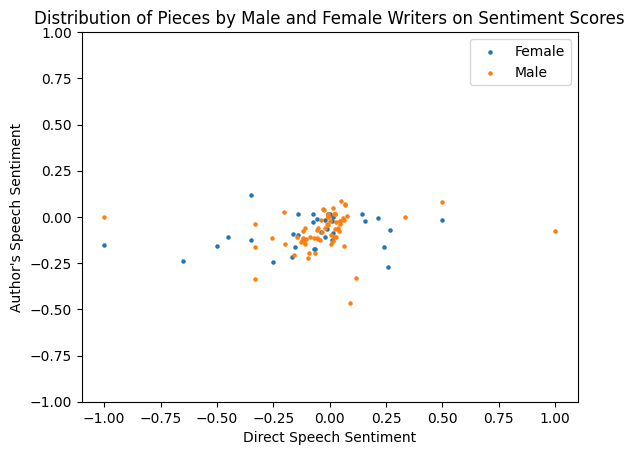

In [11]:
x_female = data_set["Direct Speech Sentiment"][:34]
x_male = data_set["Direct Speech Sentiment"][34:]
y_female = data_set["Author's Speech Sentiment"][:34]
y_male = data_set["Author's Speech Sentiment"][34:]

plt.scatter(x_female, y_female, label='Female', s=5)
plt.scatter(x_male, y_male, label='Male', s=5)
plt.yticks([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])
plt.xticks([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])
plt.legend()
plt.title('Distribution of Pieces by Male and Female Writers on Sentiment Scores')
plt.xlabel('Direct Speech Sentiment')
plt.ylabel("Author's Speech Sentiment")

plt.show()

### Dataset 2: Sentiment calculated without counting zero sentiment scores of sentences while counting average sentiment

For the dataset without zero values, we do not test these model as they it will be equivalent to the dataset above. However, we dipict the spacing of the literary work, proving their dictribution has not meaningly changed.

In [12]:
data_set2 = pd.read_excel("data\\results with dropped zero scores without zero scores.xlsx")
data_set2

,Unnamed: 0,Title,Gender,Length in characters,Overall Sentiment,Direct Speech Sentiment,Author's Speech Sentiment,Difference Value,Exceeds?
0,1,林 京子 - ギヤマン ビードロ,F,112867,-0.027478,-0.054455,-0.025238,-0.029218,No
1,2,林 京子 - 二人の墓標,F,22251,-0.230500,-0.139089,-0.203634,0.064546,Yes
2,3,林 京子 - 同期会,F,16390,0.041546,0.142857,0.045203,0.097654,Yes
3,4,林 京子 - 昭和二十年の夏,F,18826,-0.031272,0.500000,-0.035756,0.535756,Yes
4,5,林 京子 - 曇り日の行進,F,17944,-0.017073,0.155556,-0.039636,0.195192,Yes
...,...,...,...,...,...,...,...,...,...
96,112,大江 健三郎 - ヒロシマ・ノ—卜 7,M,10756,-0.197422,-0.257576,-0.188040,-0.069536,No
97,113,大江 健三郎 - 核状況のカナリア理論,M,16313,0.009970,-0.204678,0.037979,-0.242658,No
98,114,斎木寿夫 - 死者は裁かない,M,17833,-0.353362,-0.121918,-0.351449,0.229531,Yes
99,115,武田 泰淳 - 第一のボタン,M,78975,0.008466,0.045368,-0.041310,0.086679,Yes


In [13]:
data_set2.describe()

,Unnamed: 0,Length in characters,Overall Sentiment,Direct Speech Sentiment,Author's Speech Sentiment,Difference Value
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,58.792079,38571.732673,-0.141198,-0.047181,-0.155128,0.107947
std,33.338061,42313.975043,0.166724,0.239847,0.184308,0.273690
min,1.000000,482.000000,-0.534722,-1.000000,-0.733333,-0.999273
25%,31.000000,8428.000000,-0.250170,-0.114540,-0.262875,-0.015344
50%,60.000000,22251.000000,-0.151236,-0.020399,-0.164056,0.094141
75%,87.000000,51383.000000,-0.002416,0.026774,-0.013366,0.239627
max,116.000000,194666.000000,0.226667,1.000000,0.250000,1.164056


In [14]:
data_set2[["Overall Sentiment", "Direct Speech Sentiment", "Author's Speech Sentiment"]].corr()

,Overall Sentiment,Direct Speech Sentiment,Author's Speech Sentiment
Overall Sentiment,1.000000,0.361573,0.842803
Direct Speech Sentiment,0.361573,1.000000,0.187642
Author's Speech Sentiment,0.842803,0.187642,1.000000


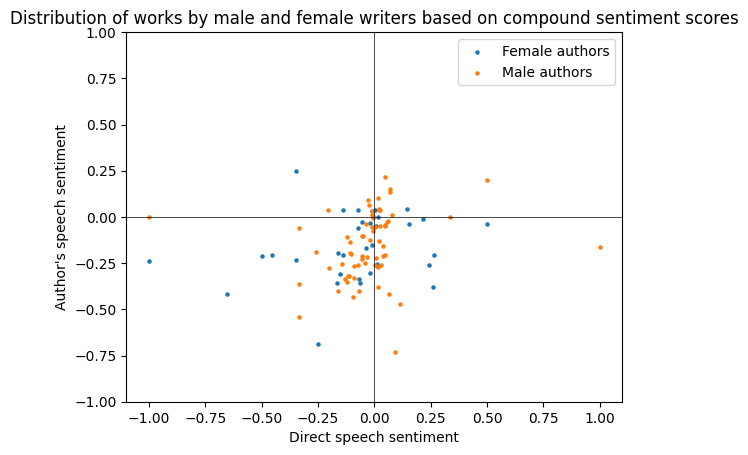

In [18]:
x_female = data_set2["Direct Speech Sentiment"][:34]
x_male = data_set2["Direct Speech Sentiment"][34:]
y_female = data_set2["Author's Speech Sentiment"][:34]
y_male = data_set2["Author's Speech Sentiment"][34:]

plt.figure()
plt.scatter(x_female, y_female, label='Female authors', s=5)
plt.scatter(x_male, y_male, label='Male authors', s=5)
plt.yticks([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])
plt.xticks([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])
plt.axhline(c="black", linewidth=0.5)
plt.axvline(c="black", linewidth=0.5)
plt.legend()
plt.title('Distribution of works by male and female writers based on compound sentiment scores')
plt.xlabel('Direct speech sentiment')
plt.ylabel("Author's speech sentiment")
plt.savefig("data\\distribution of texts.jpg",dpi=300, bbox_inches='tight')
plt.show()